In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np
import cv2
from PIL import Image
import glob
import shutil
import random

import torch
from torch import nn
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torchvision as tv
import torch.nn.functional as F
from torch import Tensor

In [18]:
data_dir = "/media/mountHDD2/Kvasir-SEG"
print(os.listdir(data_dir))

['images', 'kavsir_bboxes.json', 'masks']


In [19]:
print(os.getcwd())

/home/ly/git/DecodeItAll/bio_seman_seg/dataset/Kvasir-SEG


In [20]:
path = os.getcwd()
path_parts = path.split("/")  # Chia đường dẫn thành các phần sử dụng dấu '/'
path_with_backslash = "\\".join(path_parts)  # Kết hợp các phần lại với dấu '\'
print(path_with_backslash)


\home\ly\git\DecodeItAll\bio_seman_seg\dataset\Kvasir-SEG


In [21]:
bio_seg_dir = "/".join(path_with_backslash.split("\\")[:-2])
print(bio_seg_dir)
print(os.path.exists(bio_seg_dir))

/home/ly/git/DecodeItAll/bio_seman_seg
True


In [22]:
data_dir = bio_seg_dir + "/dataset/Kvasir-SEG"
print(os.listdir(data_dir))

['.ipynb_checkpoints', 'masks', 'training', 'testing', 'Custom Kvasir-SEG.ipynb', 'images']


In [23]:
train_dir = data_dir + "/training"
test_dir = data_dir + "/testing"

train_img_dir = train_dir + "/train images"
train_mask_dir = train_dir + "/train masks"

test_img_dir = test_dir + "/test images"

print(f"No. Train Img: {len(os.listdir(train_img_dir))}")
print(f"No. Train Msk: {len(os.listdir(train_mask_dir))}")
print(f"No. Test Img: {len(os.listdir(test_img_dir))}")

No. Train Img: 800
No. Train Msk: 800
No. Test Img: 201


CUSTOM DATA

In [24]:
class KvasirSEG(Dataset):
    def __init__(self, transform = None, target_transform = None):
        from glob import glob
        self.imgs = sorted(glob(train_img_dir + "/*"))
        self.msks = sorted(glob(train_mask_dir + "/*"))
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        img_path = self.imgs[idx]
        msk_path = self.msks[idx]

        img = Image.open(img_path)
        msk = Image.open(msk_path)

        if self.transform:
            img = self.transform(img)

        if self.target_transform:
            msk = self.target_transform(msk)

        return (img, msk)

800


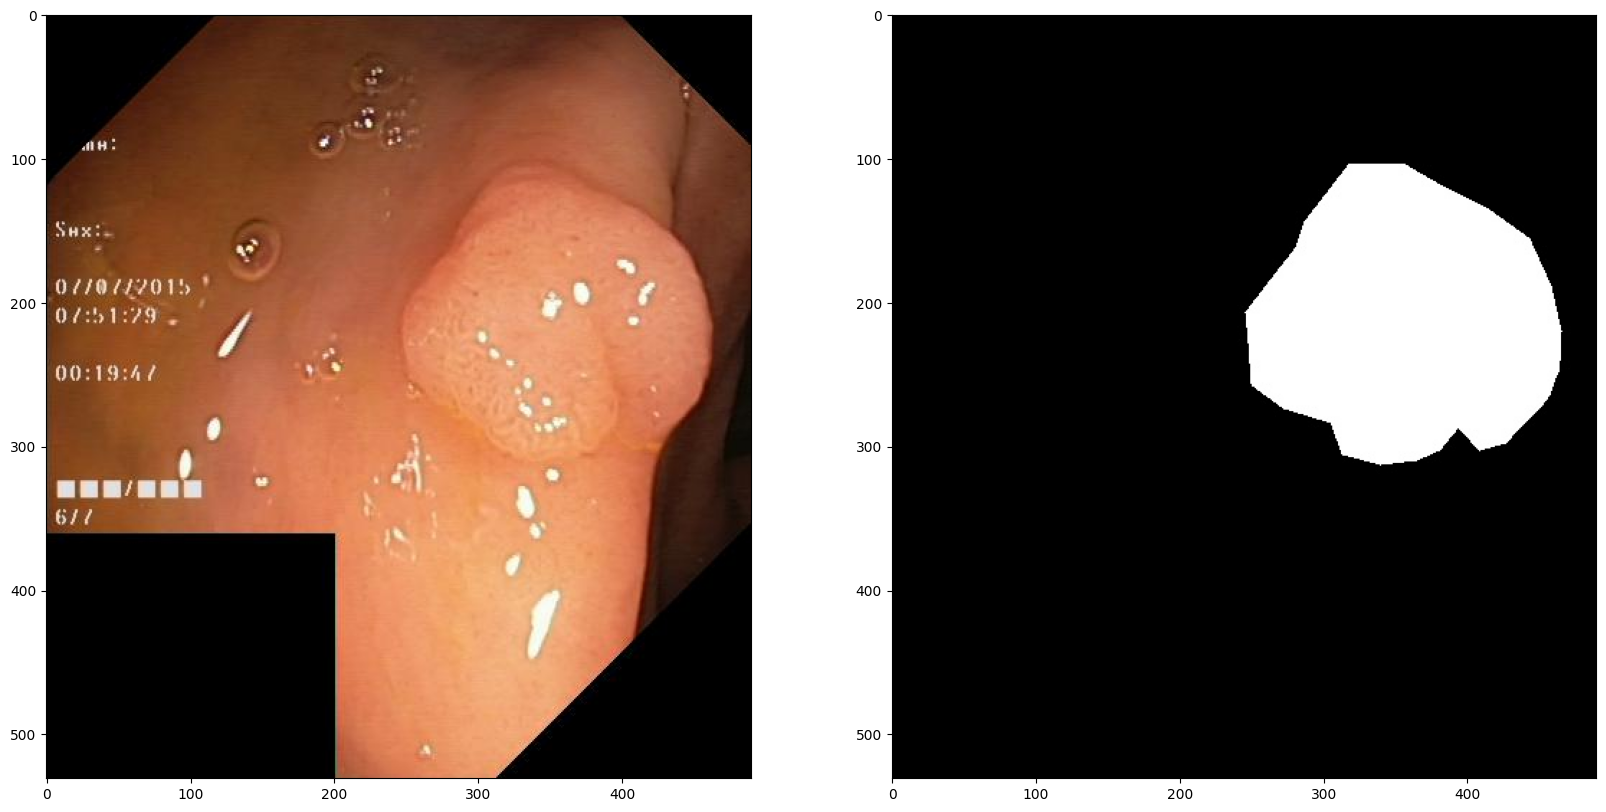

In [28]:
transform = transforms.Compose(
    [
        # transforms.Resize((256, 256)),
        transforms.ToTensor(),
    ]
)

target_transform = transforms.Compose(
    [
        # transforms.Resize((256, 256)),
        transforms.ToTensor(),
    ]
)

train_ds = KvasirSEG(transform = transform, target_transform=target_transform)

print(len(train_ds))

img, msk = train_ds[1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))

ax1.imshow(img.permute(1, -1, 0).numpy())
ax2.imshow(msk.permute(1, -1, 0).numpy(), cmap = 'gray')

Dataloader

In [32]:
train_dl = DataLoader(train_ds, batch_size=10, shuffle=True)

print(len(train_dl))

80
